https://colab.research.google.com/drive/1QARz_UGh_qaLZ8Yfo9nINy_BxwJ1UkQZ#scrollTo=aNFbbhAU7ZVz
여기서 테스트 해보고  그 augmenation을 GPU용으로 바꾸기!

In [1]:
import torch

In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib inline

##  do : json dumps에 Cii loss, Cij loss도 dump하도록 하기! (hyperparameter optimization용으로 좋을 듯)

# [for miexium] 밑에 잘 작동안해서 여기다가 하나에 대한 sample 만 보여드리겠습니다!


In [19]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import json

from pathlib import Path

base_dir = Path("/scratch/connectome/dyhan316/VAE_ADHD/barlowtwins/")

ckpt_all = {}
ckpt_batch = {}

#varying batch (only CROP)
ckpt_batch["batch_16"] = base_dir / "REAL_TRAINING_checkpoint_ABCD_batch_32_2_gpu_epoch_500_lambd_0.00102_DROP_LAST_BATCH"
ckpt_batch["batch_32"] = base_dir / "REAL_TRAINING_checkpoint_ABCD_batch_32_2_gpu_epoch_500_lambd_0.00102_DROP_LAST_BATCH"
ckpt_batch["batch_64"] = base_dir / "REAL_TRAINING_checkpoint_ABCD_batch_64_2_gpu_epoch_500_lambd_0.00102_DROP_LAST_BATCH"
ckpt_batch["batch_128"] = base_dir / "REAL_TRAINING_CROP_checkpoint_ABCD_batch_128_4_gpu_epoch_500_lambd_0.00102_DROP_LAST_BATCH"


ckpt_all['batch'] = ckpt_batch


In [20]:
from utils.plotting import open_stat_txt, avg_epoch_wise, std_epoch_wise, plot_error_bars, plot_loss

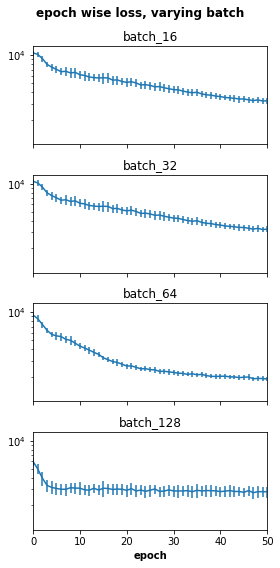

In [21]:
##plotting the average loss graph of different thigns epoch-wise
for i,name in enumerate(ckpt_all.keys()):
    plot_error_bars(ckpt_all[name], xlim = 50 ,x_label = "epoch", sub_title =  f"epoch wise loss, varying {name}", yscale = "log", what_to_plot = "loss")

never goes below 8192, as expected as all outputs are sent to zero


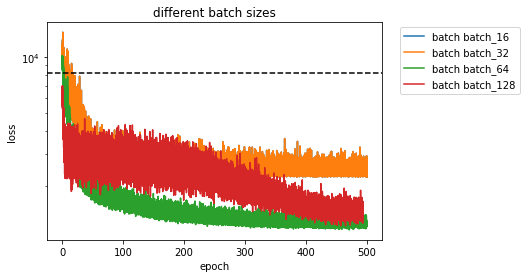

In [32]:
##comparing the batch sizes
for key in ckpt_batch.keys():
    plot_loss(ckpt_batch[key], label = f"batch {key}")

plt.axhline(8192, linestyle = '--',color = 'black')
plt.legend(bbox_to_anchor = (1.04,1), loc = 'upper left')
#plt.xlim(400,500)
#plt.ylim(0,10000)
plt.title("different batch sizes")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.yscale('log')
print('never goes below 8192, as expected as all outputs are sent to zero')

In [14]:
import os 
truth_table = ["epoch_500" in i for i in os.listdir("/scratch/connectome/dyhan316/VAE_ADHD/barlowtwins/")]

for i, yes in enumerate(truth_table):
    if yes == True:
        print(os.listdir("/scratch/connectome/dyhan316/VAE_ADHD/barlowtwins/")[i])

REAL_TRAINING_CUTOUT_checkpoint_ABCD_batch_64_2_gpu_epoch_500_lambd_0.00102_DROP_LAST_BATCH
REAL_TRAINING_CROP_checkpoint_ABCD_batch_64_2_gpu_epoch_500_lambd_0.00102_DROP_LAST_BATCH
REAL_TRAINING_CROP_checkpoint_ABCD_batch_128_4_gpu_epoch_500_lambd_0.00102_DROP_LAST_BATCH
REAL_TRAINING_checkpoint_ABCD_batch_16_2_gpu_epoch_500_lambd_0.00102_DROP_LAST_BATCH
REAL_TRAINING_checkpoint_ABCD_batch_16_2_gpu_epoch_500_lambd_0.00204_DROP_LAST_BATCH
REAL_TRAINING_checkpoint_ABCD_batch_32_2_gpu_epoch_500_lambd_0.00102_DROP_LAST_BATCH
REAL_TRAINING_checkpoint_ABCD_batch_64_2_gpu_epoch_500_lambd_0.000204_DROP_LAST_BATCH
REAL_TRAINING_checkpoint_ABCD_batch_16_2_gpu_epoch_500_lambd_0.000102_DROP_LAST_BATCH
SEE_IT_REAL_TRAINING_checkpoint_ABCD_batch_64_2_gpu_epoch_500_lambd_0.00102_DROP_LAST_BATCH
REAL_TRAINING_checkpoint_ABCD_batch_128_2_gpu_epoch_500_lambd_0.00102_DROP_LAST_BATCH
REAL_TRAINING_checkpoint_ABCD_batch_64_2_gpu_epoch_500_lambd_0.00408_DROP_LAST_BATCH
REAL_TRAINING_checkpoint_ABCD_batch_6

# ======BELOW : MAY NOT WORK WELL, BECAUSE STATS.TXT WAS UNFORTUNEATLEY ERASED... HAHA

# it's an iteration epoch (i.e. per batch) and not the whole thing, so might be different

=> because unlike mere classifications, augmentaitons make it very wild

=> therefore, loss value spiking is expected
    => might be mitigated if batch size is increase a lot 

=> ask junbeom if this happend to him too
=> should I comptue evaluate loss (over the whole dataset) or like hmmm training loss over teh whole dataset every epoch? 

* per epoch으로 보면 쭉 즐어든다고는 하네..
    * https://keras.io/examples/vision/barlow_twins/
    * https://github.com/sayakpaul/Barlow-Twins-TF
    
* 8192 projector dim and also the loss thing => maybe zero output? 
    * change $\lambda$ to see if this is true 
    * find out exactly how the loss is calculated! (실제로 8192가 나올 수 있는지)

* 값이 많이 튀니, lr을 낮춰서도 해보기 
* the NaN thing might be cause by this
    * at one augmentaiton instance the loss divereged to infinity, tehrefore the gradient descent was very large, so the model parameters were messed up => therefore now gives NaN for loss value 
    * gradient clipping?
    * 근데 fundamental solution이 아닌듯?
    * lower learning rate
* 정리해서 teams에 올리기

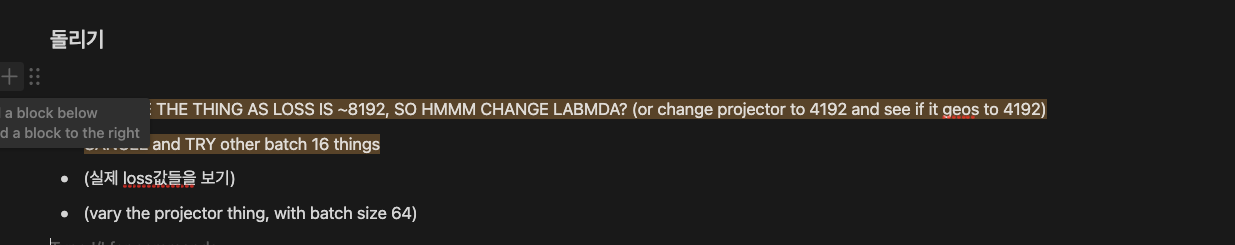

In [3]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import json

from pathlib import Path

https://pynative.com/python-parse-multiple-json-objects-from-file/

In [4]:
##define ckpt dirs in a nested directory 

base_dir = Path("/scratch/connectome/dyhan316/VAE_ADHD/barlowtwins/checkpoint_ALL/")

ckpt_all = {}
ckpt_batch = {}
ckpt_epoch = {}
ckpt_lr = {}
ckpt_lambda = {}
#ckpt_lambda_256 = {}
ckpt_lambda_128 = {}
ckpt_lambda_32 = {} #나중에 만들어지면 하기 
ckpt_drop_last = {}
ckpt_wd = {}

#varying batch
ckpt_batch["batch_16"] = base_dir / "checkpoint_ABCD_batch_16_1_rtx3090_gpu_epoch_500"
ckpt_batch["batch_32"] = base_dir / "checkpoint_ABCD_batch_32_1_rtx3090_gpu_epoch_500"
ckpt_batch["batch_64"] = base_dir / "checkpoint_ABCD_batch_64_2_rtx3090_gpu_epoch_500"
ckpt_batch["batch_128"] = base_dir / "checkpoint_ABCD_batch_128_4_rtx3090_gpu_epoch_500"

#varying epoch
ckpt_epoch["epoch_100"] = base_dir / "checkpoint_ABCD_batch_32_1_rtx3090_gpu_epoch_100"
ckpt_epoch["epoch_500"] = ckpt_batch["batch_32"]

#varying lr
ckpt_lr["lr_base"] = ckpt_epoch["epoch_100"]
ckpt_lr["lr_1percent"] = base_dir / "checkpoint_ABCD_batch_32_1_rtx3090_gpu_epoch_100_lr_w_0.002_lr_b_0.000048"

#varying lambda
ckpt_lambda['lambda_base'] = ckpt_batch['batch_64']
ckpt_lambda['lambda_0percent'] = base_dir / "checkpoint_ABCD_batch_64_2_rtx3090_gpu_epoch_100_lambd_0.0_DROP_LAST_BATCH" 
ckpt_lambda['lambda_1percent'] = base_dir / "checkpoint_ABCD_batch_64_2_rtx3090_gpu_epoch_100_lambd_0.000051"
ckpt_lambda['lambda_10percent'] = base_dir / "checkpoint_ABCD_batch_64_2_rtx3090_gpu_epoch_100_lambd_0.00051"
ckpt_lambda['lambda_20percent'] = base_dir / "checkpoint_ABCD_batch_64_2_rtx3090_gpu_epoch_100_lambd_0.00102_DROP_LAST_BATCH"
ckpt_lambda['lambda_30percent'] = base_dir / "checkpoint_ABCD_batch_64_2_rtx3090_gpu_epoch_100_lambd_0.00153_DROP_LAST_BATCH"
ckpt_lambda['lambda_50percent'] = base_dir / "checkpoint_ABCD_batch_64_2_rtx3090_gpu_epoch_100_lambd_0.00255"

#varying lambda, batch 256
#ckpt_lambda_256['lambda_base'] = None #doesn't exisdt
#ckpt_lambda_256['lambda_20percent'] = base_dir / "checkpoint_ABCD_batch_256_8_rtx3090_gpu_epoch_100_lambd_0.00102_DROP_LAST"


#varying lambda, batch 128
ckpt_lambda_128['lambda_base'] = ckpt_batch['batch_128']
ckpt_lambda_128['lambda_1percent'] = base_dir / "checkpoint_ABCD_batch_128_4_rtx3090_gpu_epoch_100_lambd_0.000051"

#varying lambda, batch 32
ckpt_lambda_32['lambda_base'] = ckpt_batch['batch_32']
ckpt_lambda_32['lambda_1percent'] = base_dir / "checkpoint_ABCD_batch_32_1_rtx3090_gpu_epoch_100_lambd_0.000051"

#DROPPING LAST BATCH OR NOT
ckpt_drop_last['no_drop'] = ckpt_lambda['lambda_1percent']
ckpt_drop_last['yes_drop'] = base_dir / "checkpoint_ABCD_batch_64_2_rtx3090_gpu_epoch_100_lambd_0.000051_DROP_LAST_BATCH"

#wd x100
#ckpt : base는 그 ckpt_lambda['lambda_10percent'] 를 base로하기! (거기를 기준으로 wd를 100배 한 것이니)
ckpt_wd['wd_base_no_drop'] = ckpt_lambda['lambda_10percent']
ckpt_wd['wd_100x_lambda_10percent_yes_drop'] = base_dir / "checkpoint_ABCD_batch_64_2_rtx3090_gpu_epoch_100_lambd_0.00051_wd_1e-4_DROP_LAST_BATCH"


#ADD THIS SOMEWHERE : checkpoint_ABCD_batch_256_8_rtx3090_gpu_epoch_100_lambd_0.00102_DROP_LAST
##이건 어디다가 넣을지 고민중...



ckpt_all['batch'] = ckpt_batch
ckpt_all['epoch'] = ckpt_epoch
ckpt_all['lr'] = ckpt_lr
ckpt_all['lambda'] = ckpt_lambda
#ckpt_all['lambda_256'] = ckpt_lambda_256
ckpt_all['lambda_128'] = ckpt_lambda_128
ckpt_all['lambda_32'] = ckpt_lambda_32
ckpt_all['drop_last'] = ckpt_drop_last
ckpt_all['wd']= ckpt_wd

print(ckpt_all.keys(), ckpt_all['batch'].keys())


dict_keys(['batch', 'epoch', 'lr', 'lambda', 'lambda_128', 'lambda_32', 'drop_last', 'wd']) dict_keys(['batch_16', 'batch_32', 'batch_64', 'batch_128'])


In [5]:
from utils.plotting import open_stat_txt, avg_epoch_wise, std_epoch_wise, plot_error_bars, plot_loss

FileNotFoundError: [Errno 2] No such file or directory: '/scratch/connectome/dyhan316/VAE_ADHD/barlowtwins/checkpoint_ALL/checkpoint_ABCD_batch_16_1_rtx3090_gpu_epoch_500/stats.txt'

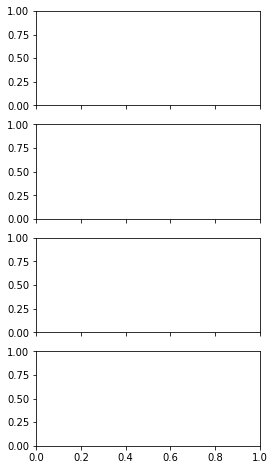

In [6]:
##plotting the average loss graph of different thigns epoch-wise
for i,name in enumerate(ckpt_all.keys()):
    plot_error_bars(ckpt_all[name], xlim = 50 ,x_label = "epoch", sub_title =  f"epoch wise loss, varying {name}", yscale = "log", what_to_plot = "loss")

every 5 epoch 단위로 spike! (8, 18, 13, and so on)

[]

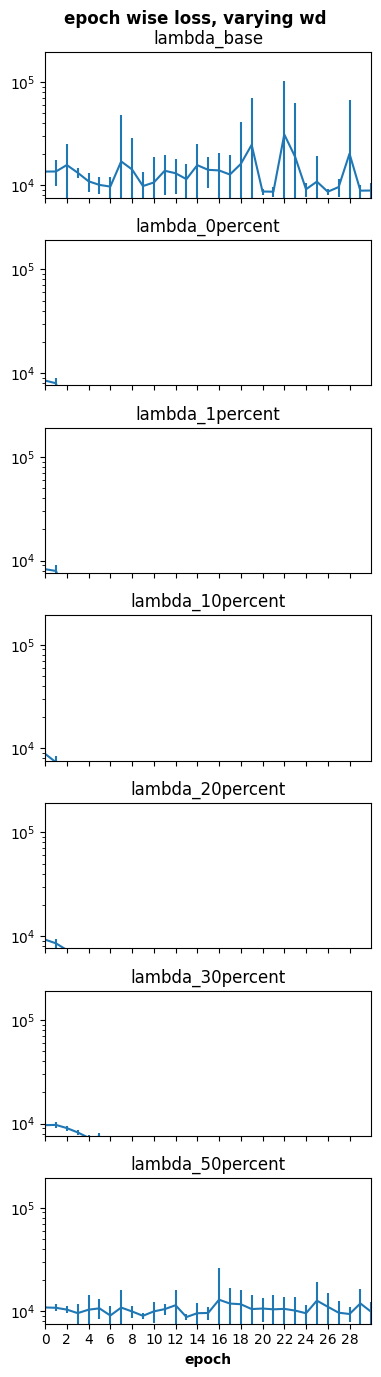

In [7]:
#view spike period
fig, axs = plot_error_bars(ckpt_lambda, xlim = 30 ,x_label = "epoch", sub_title =  f"epoch wise loss, varying {name}", yscale = "log", what_to_plot = "loss")
ticks = np.arange(0,30,2)#(1,30,1)
#labels = np.arange(0,30,5)
axs[2].set_xticks(ticks) #remove later
axs[2].set_xticklabels(ticks, rotation=45, ha='right')

as expected, with larger batch size튀는 것이 덜하다 (proportion of 튀는 값들 decresase, update becomes more stable)

### 위에서 : lambda는 loss값이 너무 적어서 값 밑으로감


### individual plot 보기
> ##USE `plot_loss` I made (also, *args, **kwargs 넣어줘서 원하는 대로 plt의 것들을 넣기 가능 ) 

밑에서 본 결과 : as expected, decreasing lambda made the loss converege somehow, and lower lambda meant faster converging 

(근데 수식 특성상 무조건 loss값이 줄어들 수 밖에 없다 lambda가 적으면... 다만, 만약 그렇다고 하더라도 lambda가 0으로 가도, 8192개가 남는데, loss가 projector dim인 8192보다 적어졌다는 것은 의미가 있는 듯?)

## 하기 

> 밑에서 periodic spikes : last batch 를 없애거나 batch size를 곱해서 하든지 해서 해결하기 

https://stackoverflow.com/questions/47824598/why-does-my-training-loss-have-regular-spikes

* 근데 여기서는 매 epoch마다인데, 우리는 완전히 매 epoch마다는 아니다.. (every 5 epochs or so)


* epoch 5단위로 spike가 난다!

> epoch으로 나오도록 만들었는데 정확하게 epoch별로가 아닌 것 같다 => 직접 dataloader length를 보자




Text(0.5, 1.0, 'different $\\lambda$ and batch sizes')

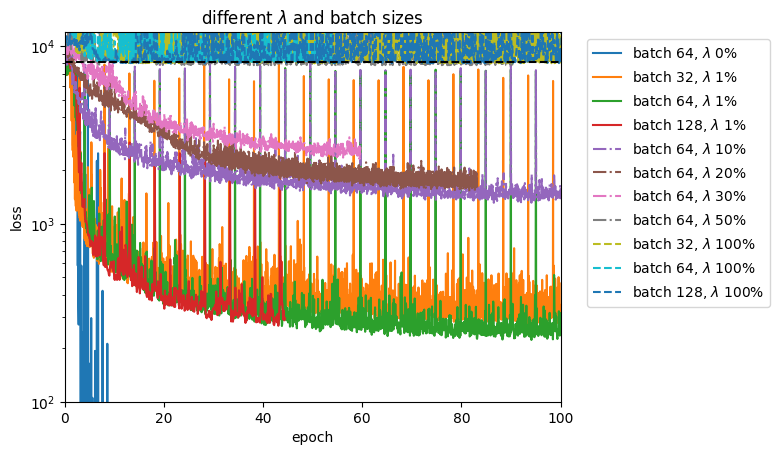

In [8]:
## comparing the lambda values 


plot_loss(ckpt_lambda['lambda_0percent'],label = "batch 64, $\lambda$ 0%")


plot_loss(ckpt_lambda_32['lambda_1percent'], label = "batch 32, $\lambda$ 1%")
plot_loss(ckpt_lambda['lambda_1percent'],label = "batch 64, $\lambda$ 1%")
plot_loss(ckpt_lambda_128['lambda_1percent'], label = "batch 128, $\lambda$ 1%")

                      
plot_loss(ckpt_lambda['lambda_10percent'], linestyle = '-.', label = "batch 64, $\lambda$ 10%")

plot_loss(ckpt_lambda['lambda_20percent'], linestyle = '-.', label = "batch 64, $\lambda$ 20%")

plot_loss(ckpt_lambda['lambda_30percent'], linestyle = '-.', label = "batch 64, $\lambda$ 30%")

plot_loss(ckpt_lambda['lambda_50percent'], linestyle = '-.', label = "batch 64, $\lambda$ 50%")

plot_loss(ckpt_lambda_32['lambda_base'], linestyle = '--',label = "batch 32, $\lambda$ 100%", )
plot_loss(ckpt_lambda['lambda_base'], linestyle = '--',label = "batch 64, $\lambda$ 100%", )
plot_loss(ckpt_lambda_128['lambda_base'], linestyle = "--",label = "batch 128, $\lambda$ 100%")


plt.axhline(8192, linestyle = '--',color = 'black')
 
plt.legend(bbox_to_anchor = (1.04,1), loc = 'upper left')
plt.xlim(0,100)
plt.ylim(100,12000)
plt.yscale('log')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("different $\lambda$ and batch sizes")

when $\lambda = 0$, convergs to zero, as expected (collapse)


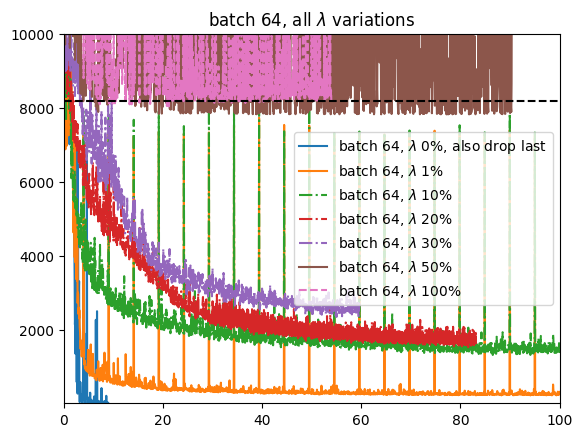

In [9]:
##batch 64, all lambda variations
plot_loss(ckpt_lambda['lambda_0percent'],label = "batch 64, $\lambda$ 0%, also drop last") #goes to zero, as expected (collapse)
plot_loss(ckpt_lambda['lambda_1percent'],label = "batch 64, $\lambda$ 1%")
plot_loss(ckpt_lambda['lambda_10percent'], linestyle = '-.', label = "batch 64, $\lambda$ 10%")
plot_loss(ckpt_lambda['lambda_20percent'], linestyle = '-.', label = "batch 64, $\lambda$ 20%")
plot_loss(ckpt_lambda['lambda_30percent'], linestyle = '-.', label = "batch 64, $\lambda$ 30%")
plot_loss(ckpt_lambda['lambda_50percent'], linestyle = '-', label = "batch 64, $\lambda$ 50%")
plot_loss(ckpt_lambda['lambda_base'], linestyle = '--',label = "batch 64, $\lambda$ 100%", )
plt.axhline(8192, linestyle = '--',color = 'black')
plt.legend()
plt.xlim(0,100)
plt.ylim(10,10000)
#plt.yscale('log')
plt.title("batch 64, all $\lambda$ variations")
print("when $\lambda = 0$, convergs to zero, as expected (collapse)")


min 8.16e-02 | mean :  2.44e+03 | max :  9.60e+03 | theoretical min/max : 0, 3.28e+04


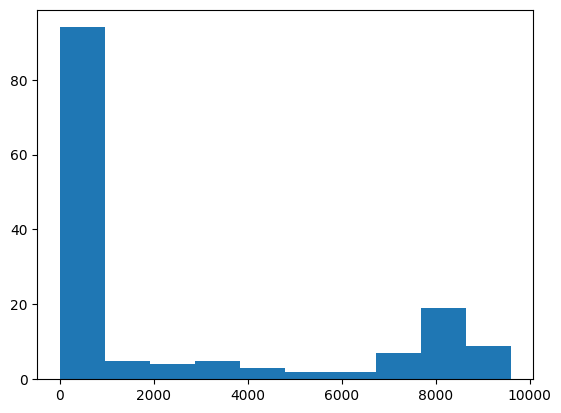

In [10]:

#indeed, the min/max of the 0% lambda case : 
loss_arr = open_stat_txt(ckpt_lambda['lambda_0percent'])[1]['loss']
plt.hist(loss_arr)
print(f"min {np.min(loss_arr):.2e} | mean : {np.mean(loss_arr): .2e} | max : {np.max(loss_arr): .2e} | theoretical min/max : 0, { 2**2*8192 :.2e}")

as expected, larger batch size : less noisy, but same loss trajectory overall


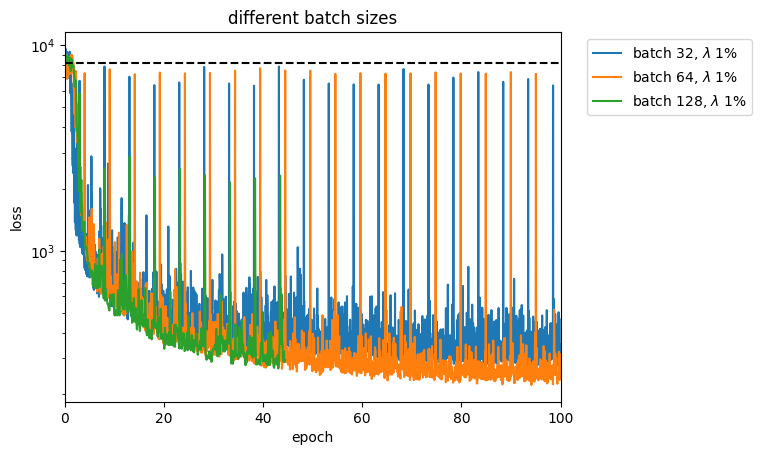

In [11]:
##varying batchsize, all others equal

plot_loss(ckpt_lambda_32['lambda_1percent'], label = "batch 32, $\lambda$ 1%")
plot_loss(ckpt_lambda['lambda_1percent'],label = "batch 64, $\lambda$ 1%")
plot_loss(ckpt_lambda_128['lambda_1percent'], label = "batch 128, $\lambda$ 1%")


plt.axhline(8192, linestyle = '--',color = 'black')
 
plt.legend(bbox_to_anchor = (1.04,1), loc = 'upper left')
plt.xlim(0,100)
#plt.ylim(100,12000)
plt.yscale('log')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("different batch sizes")
print("as expected, larger batch size : less noisy, but same loss trajectory overall")


also, I see periodic spiking of loss...왜 이런거지???? 게다가, lambda상관없이 같은 batch면 둘다 같은 epoch에서 spike가 일어남... random한것 아니었나..?

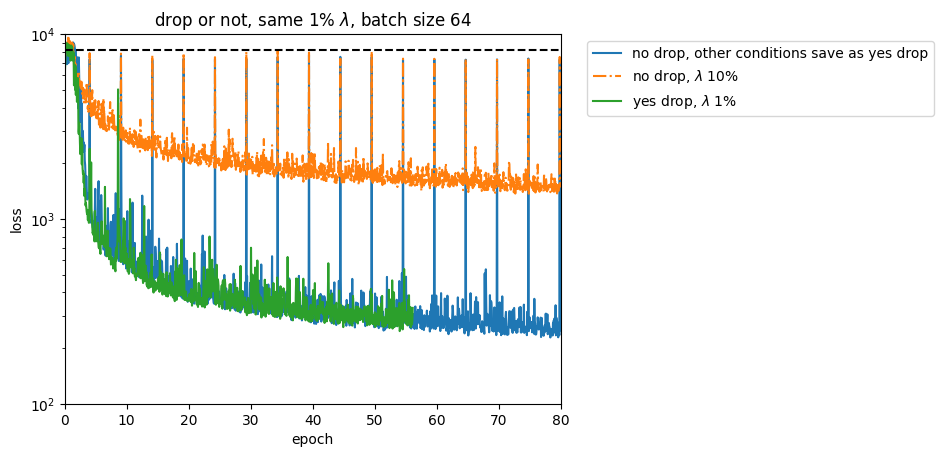

In [12]:
##plotting whether drop lat or not

plot_loss(ckpt_drop_last['no_drop'], label = "no drop, other conditions save as yes drop")
plot_loss(ckpt_lambda['lambda_10percent'], linestyle = '-.', label = "no drop, $\lambda$ 10%")
plot_loss(ckpt_drop_last['yes_drop'], sub_count=5318- 5318%64, label = "yes drop, $\lambda$ 1%") #subtract 5318%64 because we don't do last batch 
plt.axhline(8192, linestyle = '--',color = 'black')
plt.legend(bbox_to_anchor = (1.04,1), loc = 'upper left')
plt.xlim(0,80)
plt.ylim(100,10000)
plt.title("drop or not, same 1% $\lambda$, batch size 64")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.yscale('log')

Text(0, 0.5, 'loss')

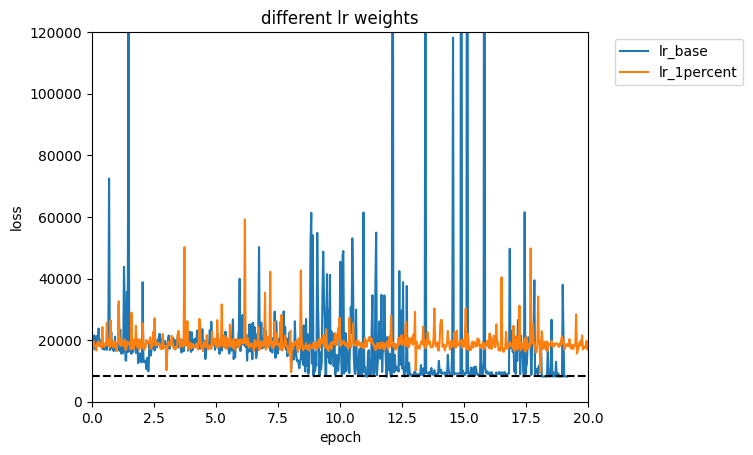

In [13]:
##comparing the lr weights
for key in ckpt_lr.keys():
    plot_loss(ckpt_lr[key], label = f"{key}")

plt.axhline(8192, linestyle = '--',color = 'black')
plt.legend(bbox_to_anchor = (1.04,1), loc = 'upper left')
plt.xlim(0,20)
plt.ylim(0,120000)
plt.title("different lr weights")
plt.xlabel("epoch")
plt.ylabel("loss")

never goes below 8192, as expected as all outputs are sent to zero


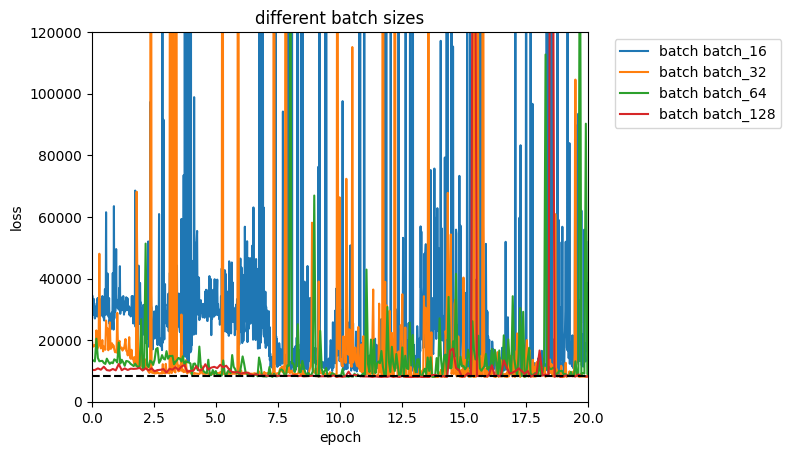

In [14]:
##comparing the batch sizes
for key in ckpt_batch.keys():
    plot_loss(ckpt_batch[key], label = f"batch {key}")

plt.axhline(8192, linestyle = '--',color = 'black')
plt.legend(bbox_to_anchor = (1.04,1), loc = 'upper left')
plt.xlim(0,20)
plt.ylim(0,120000)
plt.title("different batch sizes")
plt.xlabel("epoch")
plt.ylabel("loss")
print('never goes below 8192, as expected as all outputs are sent to zero')

Text(0, 0.5, 'loss')

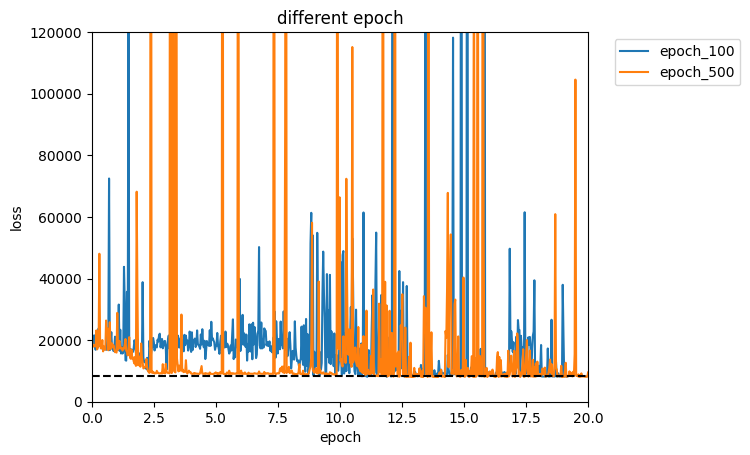

In [15]:
##comparing the epoch sizes
for key in ckpt_epoch.keys():
    plot_loss(ckpt_epoch[key], label = f"{key}")

plt.axhline(8192, linestyle = '--',color = 'black')
plt.legend(bbox_to_anchor = (1.04,1), loc = 'upper left')
plt.xlim(0,20)
plt.ylim(0,120000)
plt.title("different epoch")
plt.xlabel("epoch")
plt.ylabel("loss")

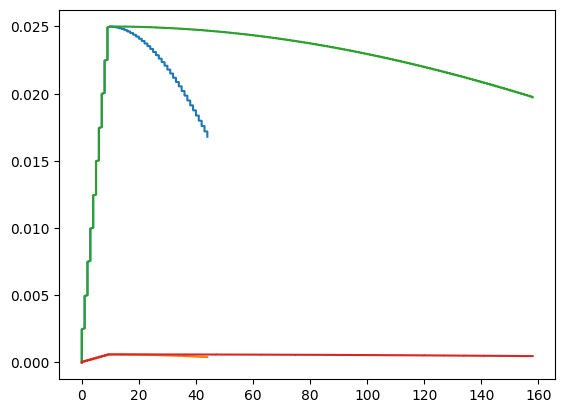

In [16]:
##different epoch 에 따른 lr 값들 변화어떻게 하는지 보기 

df = open_stat_txt(ckpt_epoch['epoch_100'])[1]
plt.plot(df['epoch'],df['lr_weights'])
plt.plot(df['epoch'],df['lr_biases'])

df = open_stat_txt(ckpt_epoch['epoch_500'])[1]

plt.plot(df['epoch'],df['lr_weights'])
plt.plot(df['epoch'],df['lr_biases'])


Text(0, 0.5, 'loss')

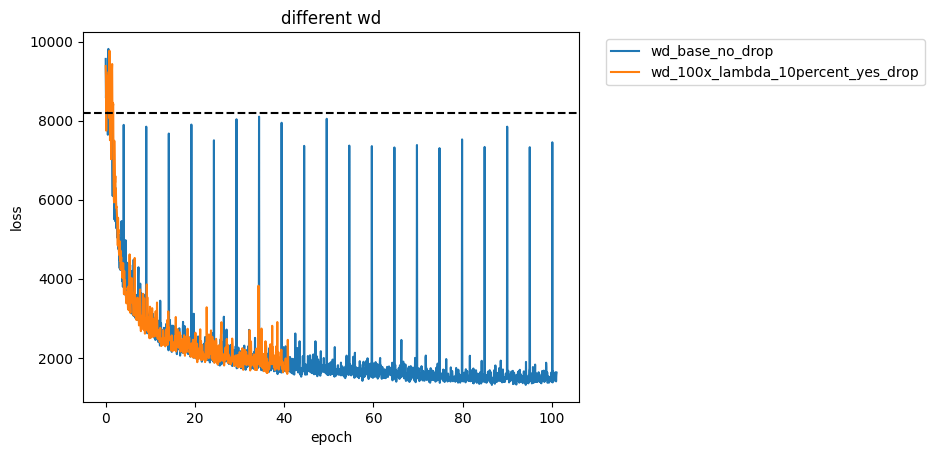

In [17]:
##comparing the wd varies
for key in ckpt_wd.keys():
    plot_loss(ckpt_wd[key], label = f"{key}")

plt.axhline(8192, linestyle = '--',color = 'black')
plt.legend(bbox_to_anchor = (1.04,1), loc = 'upper left')
#plt.xlim(0,20)
plt.title("different wd")
plt.xlabel("epoch")
plt.ylabel("loss")

(0.0, 100.0)

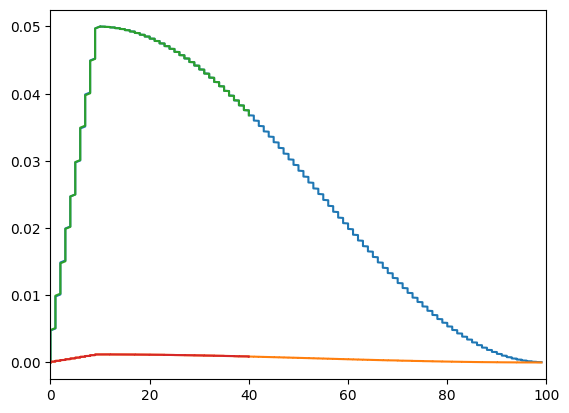

In [18]:
##different wd 에 따른 lr 값들 변화어떻게 하는지 보기 

df = open_stat_txt(ckpt_wd['wd_base_no_drop'])[1]
plt.plot(df['epoch'],df['lr_weights'])
plt.plot(df['epoch'],df['lr_biases'])

df = open_stat_txt(ckpt_wd['wd_100x_lambda_10percent_yes_drop'])[1]

plt.plot(df['epoch'],df['lr_weights'])
plt.plot(df['epoch'],df['lr_biases'])


plt.xlim(0,100)

(0.0, 100.0)

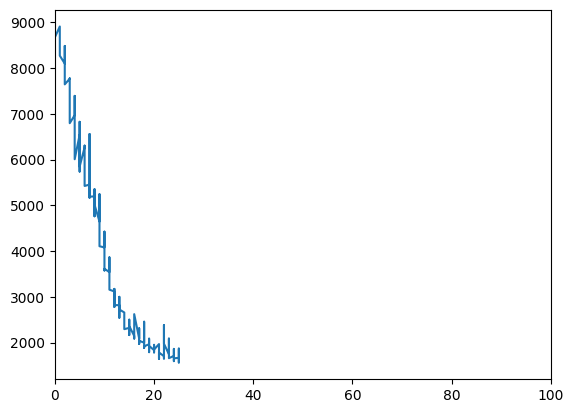

In [19]:
# testing batch size 256

df = open_stat_txt(base_dir / "checkpoint_ABCD_batch_256_8_rtx3090_gpu_epoch_100_lambd_0.00102_DROP_LAST")[1]
plt.plot(df['epoch'],df['loss'])

plt.xlim(0,100)

In [20]:
a, df = open_stat_txt(ckpt_epoch['epoch_500'])

In [21]:
print(a)

/scratch/connectome/dyhan316/VAE_ADHD/barlowtwins//main_3D.py /scratch/connectome/3DCNN/data/1.ABCD/1.sMRI_fmriprep/preprocessed_masked --checkpoint-dir /scratch/connectome/dyhan316/VAE_ADHD/barlowtwins//checkpoint_ABCD_batch_32_1_rtx3090_gpu_epoch_500 --batch-size 32 --print-freq 5 --save-every 50 --epochs 500



In [22]:
0.0051*0.5

0.00255

In [23]:
32*(df['step']/df['epoch'])

0               NaN
1               inf
2               inf
3               inf
4               inf
           ...     
5306    5373.164557
5307    5374.177215
5308    5375.189873
5309    5376.202532
5310    5377.215190
Length: 5311, dtype: float64

In [24]:
5375/7091

0.7580031025243266

In [25]:
0.76*7091

5389.16

In [26]:
ckpt_lambda_128.keys()

dict_keys(['lambda_base', 'lambda_1percent'])

(<Figure size 400x1400 with 7 Axes>,
 array([<AxesSubplot:title={'center':'lambda_base'}>,
        <AxesSubplot:title={'center':'lambda_0percent'}>,
        <AxesSubplot:title={'center':'lambda_1percent'}>,
        <AxesSubplot:title={'center':'lambda_10percent'}>,
        <AxesSubplot:title={'center':'lambda_20percent'}>,
        <AxesSubplot:title={'center':'lambda_30percent'}>,
        <AxesSubplot:title={'center':'lambda_50percent'}, xlabel='epoch'>],
       dtype=object))

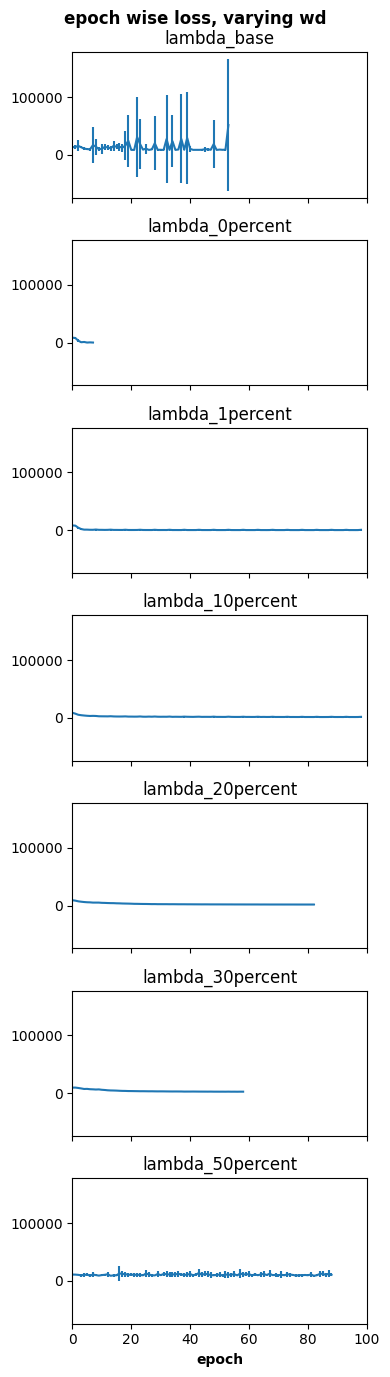

In [27]:
#scale을 lienar로 하기 보이기는 함 
plot_error_bars(ckpt_lambda, xlim = 100 ,x_label = "epoch", sub_title =  f"epoch wise loss, varying {name}", yscale = "linear", what_to_plot = "loss")

In [28]:
meta

NameError: name 'meta' is not defined

In [ ]:
name = "hi"
plot_error_bars(ckpt_lambda, xlim = 10 ,x_label = "epoch", sub_title =  f"epoch wise loss, varying {name}", yscale = "log", what_to_plot = "loss")

In [ ]:
a = open_stat_txt(ckpt_lambda['lambda_1percent'])[1]
epoch_average_loss = avg_epoch_wise(a)
epoch_std_loss = avg_epoch_wise(a)
plt.errorbar(epoch_average_loss.index, epoch_average_loss['loss'], 
                       epoch_std_loss['loss'])
plt.yscale('log')
plt.xlim(0,100)

In [ ]:
plot_error_bars(ckpt_lambda, xlim = 100 ,x_label = "epoch", sub_title =  f"epoch wise loss, varying {name}", yscale = "log", what_to_plot = "loss")

In [ ]:
#epoch으로 합치는 것 하지 말고 그냥 전체 loss모두 plot하기 
plt.plot(open_stat_txt(ckpt_lambda['lambda_1percent'])[1]['loss'])
plt.axvspan(50,70, facecolor = 'red', alpha = 0.1, label = 'ha')
plt.legend()

#근데 같은 epoch상에서 비교하려면, x axis는 epoch이 되도록 (but 여전히 step은 가도록)
#step을 뭐로 나누거나 해야하나?
#이것 관련해서 공부해서, loss graph가 실제로 줄어드는지 확인하느 것도 좋을 듯 

In [ ]:



fig, axs = plt.subplots(3,3)

axs[0,0].plot(df['epoch'])
axs[0,0].plot(df['loss'])

In [ ]:

fig, axs = plt.subplots(3)

axs[0].plot(df['epoch'])
axs[0].plot(df['loss'])

In [ ]:
meta_data, df = open_stat_txt(ckpt_dirs["batch_64"])
from utils.plotting import plot
#plot(df)
plot()

In [ ]:
plt.plot(average_epoch_wise(df)['loss'])

In [ ]:
meta_data, df = open_stat_txt(ckpt_dirs["batch_128"])
len(average_epoch_wise(df))
#plt.plot(average_epoch_wise(df)['epoch'], average_epoch_wise(df)['loss'])
plt.plot(average_epoch_wise(df)['loss'])

In [ ]:
df['epoch'].max()

In [ ]:
plt.plot(df['step'], df['loss'])
#plt.xlim(0,3000)
plt.xlim(0,6000)
plt.yscale('log')

In [ ]:
file = open(barlow_dir, 'r')
loss = []
for i,line in enumerate(file):
    print(line)

In [ ]:
total_list = []
with open(barlow_dir, 'r') as f:
    meta_data = next(f)
    for line in f.read:
        line_dict = json.loads(line)
        total_list.append(line_dict)
print(total_list)
        

In [ ]:
file = open(barlow_dir, 'r')

meta_data = next(file) #the first line is saved as meta_data, and the rest is file, so that it can be loaded using 
                #pd.read_json

total_list = []
for line in file:
    line_dict = json.loads(line)
    total_list.append(line_dict)

print(total_list)
    
    
#a=[]
#for i, line in enumerate(file):
#    print(i, line)
#    if i!=0:
#        a = json.loads(line) 
#        break
#print(type(a))

In [ ]:
pd.read_json()

In [ ]:
type(file)